# Homework 8
## Problem 3.a
Calculate the minimum value for $\frac{L'}{V'}$

$\frac{L'_{min}}{V'}$ is found by where the operating line intersects the equilibrium curve. In this case, the op line will be tangent with the EQ curve because the EQ curve is concave down. Assuming a dilute solute, and the liquid feed is pure water,
$$
L'_{min} = V'K_N \tag{1}
$$

The data first needs to be converted into mole ratios. $y$ is related to the partial pressure by
$$
y = \frac{p_i}{P}
$$

where $p_i$ is the partial pressure and $P$ is the system pressure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
P = 101
x = np.array([0,.033,.072,.117,.171])                   #ace/water
ppAce = np.array([0,30,62.8,85.4,103])*.133322                #kpa
y = ppAce/P
X = x/(1-x)
Y = y/(1-y)
xinterp = interp1d(Y,X)

In [3]:
yNp1 = .15                                                              #mol frac vap feed
YNp1 = yNp1/(1-yNp1)        
XN = .95*YNp1                                                           #acetone absorbed in liquid exit
Y1 = .05*YNp1                                                           #acetone in vap exit
Vp = .85/.15                                                            
X0 = 0                                                                  #pure water

In [4]:
xN = XN/(1+XN)
KN = yNp1/xN
Lpmin = Vp*KN                                                           #assume dilute 

slope = Lpmin/Vp

def Ynp1(Xn,m):
    return (Xn-X0)*m+Y1
dep = np.linspace(X0,XN)

''

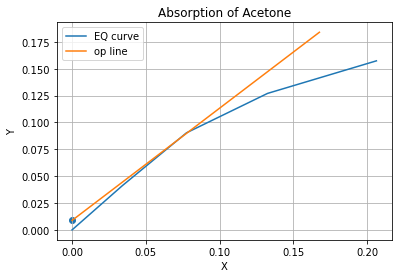

In [5]:
plt.plot(X,Y,label='EQ curve')
plt.scatter(X0,Y1)
plt.plot(dep,Ynp1(dep,slope),label='op line')
plt.grid()
plt.legend()
plt.title('Absorption of Acetone')
plt.xlabel('X')
plt.ylabel('Y')
;

The minimum value for $\frac{L'}{V'}$ is about $1.045$.

## Problem 3.b
Calculate $N_t$ if using $1.75L'_{min}$

The number of equilibrium stages can be found by plotting the EQ curve and op line and drawing in the lines to connect them.

0.3153308823529412
0.16764705882352943


''

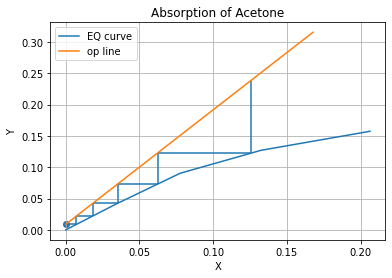

In [6]:
slope2 = 1.75*slope

plt.plot(X,Y,label='EQ curve')
plt.scatter(X0,Y1)
plt.plot(dep,Ynp1(dep,slope2),label='op line')

x1 = xinterp(Y1)                                                            #lines connecting eq and op lines
y1 = Ynp1(x1,slope2)
x2 = xinterp(y1)
y2 = Ynp1(x2,slope2)
x3 = xinterp(y2)
y3 = Ynp1(x3,slope2)
x4 = xinterp(y3)
y4 = Ynp1(x4,slope2)
x5 = xinterp(y4)
y5 = Ynp1(x5,slope2)
    
plt.hlines(Y1,X0,x1)                    
plt.vlines(x1,Y1,y1)
plt.hlines(y1,x1,x2)
plt.vlines(x2,y1,y2)
plt.hlines(y2,x2,x3)
plt.vlines(x3,y2,y3)
plt.hlines(y3,x3,x4)
plt.vlines(x4,y3,y4)
plt.hlines(y4,x4,x5)
plt.vlines(x5,y4,y5)

plt.grid()
plt.title('Absorption of Acetone')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
print(Ynp1(XN,slope2))
print(XN)
;

$6$ equilibrium stages are needed for $1.75L'_{min}$

## Problem 3.c
Calculate mole fraction of acetone in exit water.

$x_N$ can be found by the relationship
$$
x_N = \frac{X_N}{1+X_N}
$$

$X_N$ is described in the problem statement to be $95$% of the acetone in the vapor feed. $x_N$ was solved for previously to be about 0.144